<a href="https://colab.research.google.com/github/brennomongero/alura-git/blob/master/Regress%C3%A3o_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import pyarrow.feather as feather
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
dados = feather.read_feather("pais.feather")

In [12]:
dados.head()

,pais,cpi,idade,horas
0,Argentina,3.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0
3,Belgium,7.1,67,30.1
4,Brazil,4.0,59,35.0


In [14]:
dados.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.799999
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.099998


<ipython-input-16-bc206f9a598a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


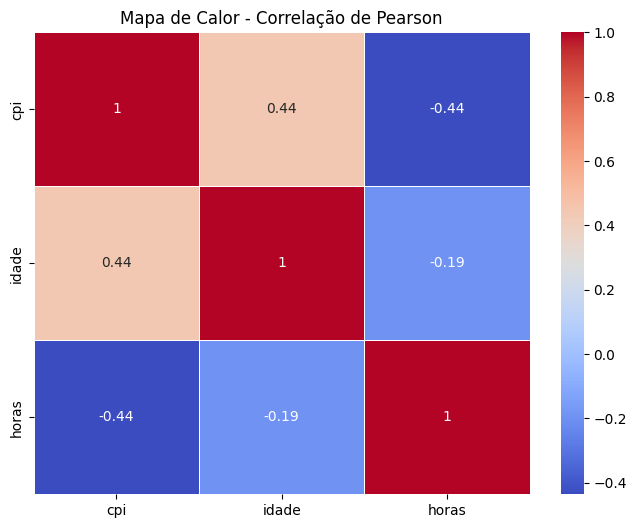

In [16]:
# Criar o mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor - Correlação de Pearson')
plt.show()

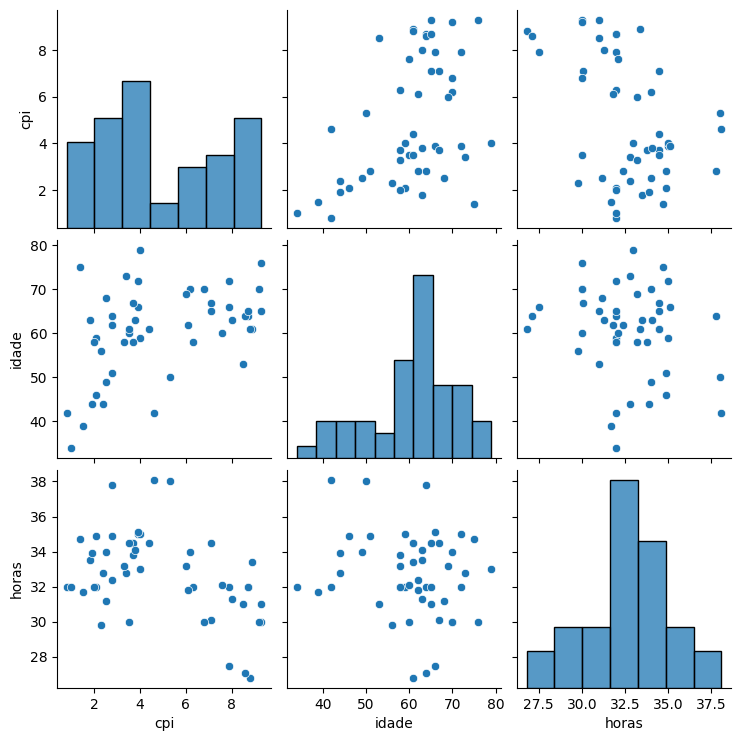

In [17]:
# Gráfico de dispersão individual para cada par de variáveis
sns.pairplot(dados)

In [22]:
# Estimar o modelo de regressão múltipla com intercepto automático
modelo_paises = smf.ols(formula='cpi ~ idade + horas', data=dados).fit()
modelo_paises.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           0.000101
Time:                        21:20:44   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# siginificância de 5%
modelo_paises.conf_int(alpha=0.05)

,0,1
Intercept,1.580527,22.363308
idade,0.033986,0.165410
horas,-0.672256,-0.130418


In [24]:
#Incoporando os fittedvalues ao dataframe
dados['cpifit'] = modelo_paises.fittedvalues

In [25]:
dados.head()

,pais,cpi,idade,horas,cpifit
0,Argentina,3.9,72,35.0,5.103394
1,Australia,8.7,64,32.0,5.509820
2,Austria,7.9,72,32.0,6.307404
3,Belgium,7.1,67,30.1,6.571454
4,Brazil,4.0,59,35.0,3.807319


In [35]:
#Novas variáveis para predições
dados_novos = pd.DataFrame({
    'idade': [56, 91, 36, 58],
    'horas': [29.8, 35.1, 18, 32]})

In [36]:
#Fazendo a predição
previsões = modelo_paises.predict(dados_novos)

In [37]:
#Predições de acordo com a OLS multipla
previsões

0    5.595176
1    6.957525
2    8.336988
3    4.911631
dtype: float64